## Homework 1

## Installing dependencies

Yandex team said they have to resolve some issues on their side and suggested a rescue plan without the shared docker. Our HA will be slightly reduced due to missing dependencies: jax, nutpie. 

1. Choose python 3.7 image for the project.
2. Install these 2 dependencies for for this HA. Expect some warnings emmited

> **The submission (zip file) consists of the notebook.ipynb + trace1 ... traceN.nc files** (file, export project as ZIP)

## Estimating Purchases

In [511]:
import pymc as pm
import numpy as np
import pandas as pd
import io
import aesara.tensor as at
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
az.style.use("arviz-white")
%matplotlib inline

WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


You have raw purchase data (**obs**) from three grocery stores (**index**) for the same product (zero means a customer did not buy the product). Groceries are of different size so number of observations are different. You need to compare which grocery is more efficient in sales.


1. (5 pt) Propose and motivate a likelihood for the problem
    * likelihood with negative support = -5 points
2. (10 pt) Propose and motivate a probabilistic model (non-hierarchical) for the problem. Some parameters may be shared, some independent if you want.
    0. (2.5 pt) Write LaTeX equation for the model (displaying model is ok)
    1. (2.5 pt) Motivate priors, under the only assumption that purchases are at orders of 100s and no more than 500
    2. (2.5 pt) Make a prior predictive check to confirm your choice
    3. (2.5 pt) Sample from the model, plot traces compare it with prior, comment on it (e.g. infulence of data size).
    4. **total score for the section is multiplied by (1- divergent samples / total samples)**
    5. Save trace into traceN.nc
3. (10 pt) Propose a hierarchical model for the problem. Put hierarchy on only one model parameter (you choose which one, prefer mean)
    
    same as 2.
    
4. (10 pt) Propose a hierarchical model for the problem. Put hierarchy on 2 model parameters (you choose which additional one, prefer p)
    
    same as 2

5. (5 pt) Perform a model comparison study (look into [`az.compare`](https://arviz-devs.github.io/arviz/api/generated/arviz.compare.html)), you can use the models you have (at least 2)
    1. Interpret the result and choose the model, elaborate on warnings
6. (5 pt) Business Metric (bonus)
    1. Propose and motivate a comparison metric between groceries to say (A is better than B)
    2. Evaluate the metric on the the best model you have
7. (5 pt) Make a prediction for a new store, you need model from (4) (bonus)

(max 40 pt)

**Important**
> Use quoting for the main points of your solution

In [512]:
raw_data = io.StringIO('obs,store\n117,0\n0,0\n0,0\n134,0\n0,0\n0,0\n0,0\n0,0\n122,0\n0,0\n108,0\n0,0\n0,0\n0,0\n0,0\n124,0\n0,0\n0,0\n113,0\n118,0\n0,0\n105,0\n114,0\n0,0\n118,0\n106,0\n0,0\n100,0\n0,0\n0,0\n123,0\n0,0\n0,0\n0,0\n0,0\n129,0\n0,0\n117,0\n0,0\n0,0\n0,0\n0,0\n0,0\n115,0\n123,0\n0,0\n0,0\n0,0\n137,0\n0,0\n0,0\n0,0\n0,0\n0,0\n136,0\n0,0\n107,0\n0,0\n0,0\n0,0\n0,0\n115,0\n118,0\n0,0\n105,0\n105,0\n97,0\n121,0\n0,0\n0,0\n0,0\n124,0\n114,0\n0,0\n101,0\n0,0\n0,0\n0,0\n121,0\n0,0\n0,0\n0,0\n119,0\n0,0\n108,0\n121,0\n0,0\n0,0\n116,0\n0,0\n0,0\n0,0\n0,0\n0,0\n0,0\n0,0\n127,0\n0,0\n0,0\n106,0\n0,0\n0,0\n0,0\n131,0\n0,0\n0,0\n128,0\n122,0\n0,0\n0,0\n0,0\n0,0\n0,0\n0,0\n102,0\n119,0\n0,0\n0,0\n0,0\n123,0\n0,0\n0,0\n0,0\n120,0\n0,1\n0,1\n0,1\n0,1\n0,1\n121,1\n0,1\n0,1\n0,1\n123,1\n0,1\n106,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n142,1\n0,1\n0,1\n0,1\n131,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,1\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n81,2\n0,2\n0,2\n73,2\n0,2\n0,2\n0,2\n69,2\n0,2\n94,2\n0,2\n91,2\n0,2\n0,2\n98,2\n0,2\n79,2\n90,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n102,2\n0,2\n87,2\n0,2\n81,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n86,2\n97,2\n0,2\n0,2\n0,2\n76,2\n0,2\n83,2\n0,2\n0,2\n88,2\n0,2\n86,2\n0,2\n0,2\n99,2\n0,2\n0,2\n86,2\n86,2\n0,2\n93,2\n0,2\n0,2\n0,2\n90,2\n0,2\n81,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n91,2\n0,2\n0,2\n67,2\n107,2\n0,2\n0,2\n0,2\n0,2\n101,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n75,2\n112,2\n0,2\n0,2\n0,2\n0,2\n0,2\n91,2\n0,2\n0,2\n0,2\n81,2\n108,2\n92,2\n0,2\n0,2\n0,2\n90,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n93,2\n0,2\n0,2\n0,2\n96,2\n0,2\n0,2\n0,2\n0,2\n94,2\n0,2\n90,2\n0,2\n0,2\n0,2\n0,2\n94,2\n0,2\n0,2\n0,2\n0,2\n72,2\n0,2\n97,2\n0,2\n82,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n105,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n99,2\n90,2\n0,2\n76,2\n92,2\n0,2\n0,2\n0,2\n0,2\n0,2\n100,2\n113,2\n0,2\n0,2\n0,2\n100,2\n0,2\n91,2\n0,2\n88,2\n0,2\n0,2\n0,2\n83,2\n0,2\n0,2\n82,2\n0,2\n84,2\n101,2\n0,2\n0,2\n0,2\n0,2\n102,2\n0,2\n0,2\n0,2\n99,2\n91,2\n0,2\n95,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n73,2\n0,2\n80,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n90,2\n0,2\n0,2\n0,2\n0,2\n95,2\n0,2\n91,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n92,2\n0,2\n0,2\n97,2\n70,2\n102,2\n0,2\n0,2\n0,2\n87,2\n111,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n73,2\n79,2\n99,2\n0,2\n0,2\n88,2\n88,2\n0,2\n0,2\n94,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n94,2\n0,2\n88,2\n0,2\n0,2\n0,2\n0,2\n0,2\n80,2\n90,2\n0,2\n0,2\n0,2\n87,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n105,2\n0,2\n0,2\n88,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n71,2\n0,2\n103,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n96,2\n0,2\n0,2\n0,2\n94,2\n0,2\n79,2\n110,2\n0,2\n0,2\n0,2\n90,2\n0,2\n0,2\n0,2\n101,2\n0,2\n95,2\n94,2\n0,2\n0,2\n0,2\n0,2\n0,2\n85,2\n0,2\n100,2\n92,2\n0,2\n0,2\n0,2\n110,2\n0,2\n0,2\n0,2\n0,2\n78,2\n0,2\n74,2\n0,2\n103,2\n0,2\n0,2\n0,2\n0,2\n90,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n90,2\n105,2\n0,2\n0,2\n0,2\n103,2\n0,2\n0,2\n0,2\n0,2\n98,2\n89,2\n105,2\n0,2\n0,2\n93,2\n0,2\n93,2\n0,2\n0,2\n0,2\n0,2\n88,2\n88,2\n0,2\n0,2\n91,2\n0,2\n89,2\n0,2\n0,2\n100,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n75,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n85,2\n0,2\n83,2\n0,2\n0,2\n80,2\n0,2\n0,2\n0,2\n0,2\n89,2\n0,2\n0,2\n76,2\n0,2\n89,2\n0,2\n0,2\n0,2\n0,2\n0,2\n88,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n101,2\n0,2\n112,2\n92,2\n0,2\n0,2\n0,2\n0,2\n0,2\n93,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n0,2\n95,2\n0,2\n0,2\n94,2\n0,2\n0,2\n0,2\n0,2\n0,2\n104,2\n0,2\n89,2\n0,2\n88,2\n0,2\n0,2\n0,2\n0,2\n86,2\n82,2\n0,2\n0,2\n0,2\n0,2\n0,2\n91,2\n0,2\n83,2\n0,2\n81,2\n0,2\n0,2\n87,2\n0,2\n0,2\n0,2\n83,2\n0,2\n94,2\n0,2\n0,2\n81,2\n0,2\n0,2\n0,2\n87,2\n0,2\n0,2\n108,2\n')
data = pd.read_csv(raw_data)

In [513]:
data

,obs,store
0,117,0
1,0,0
2,0,0
3,134,0
4,0,0
...,...,...
696,0,2
697,87,2
698,0,2
699,0,2


## 1. Data description
1. Propose and motivate a likelihood for the problem

## 2. Probabilistic model

2. Propose and motivate a probabilistic model (non-hierarchical) for the problem. Some parameters may be shared, some independent if you want.
    
    0. Write LaTeX equation for the model (displaying latex model is ok)
    1. Motivate priors, under the only assumption that purchases are at orders of 100s and no more than 500
    2. Make a prior predictive check to confirm your choice
    3. Sample from the model, plot traces compare it with prior, comment on it (e.g. infulence of data size).

**hints:**
1. explore `at.stack` to fix shape issues with mixture probability

В данных встречается много нулей, поэтому разумно использовать распределения класса Zero Inflated, например, Zero Inflated Poisson, так как в данных встречаются только целые числа. У этого распределения 2 параметра: $\mu$ и $\psi$: $\mu >= 0$, для него можно брать распределения для неотрицательных случайных величин, например, логнормальное. $0 < \psi < 1$, для этого параметра подойдет Beta распределение. 

In [514]:
with pm.Model(coords=dict(store=range(3))) as model:
    psi = pm.Beta("psi", 1, 0.5)
    mu = pm.LogNormal("mu", mu=3, sigma=0.5)
    y = pm.ZeroInflatedPoisson("obs", psi, mu, observed=data.obs)

In [516]:
model

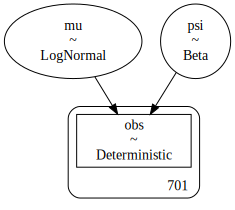

In [627]:
pm.model_to_graphviz(model)

In [517]:
with model:
    prior = pm.sample_prior_predictive()

Моменты распределений подбирались так, чтобы prior predictive находились в разумных пределах относительно наблюдаемых данных.

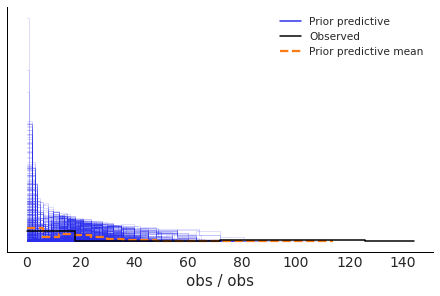

In [518]:
az.plot_ppc(prior, group="prior");

In [519]:
with model:
    trace = pm.sample()
    trace.extend(prior)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [psi, mu]
Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3 seconds.


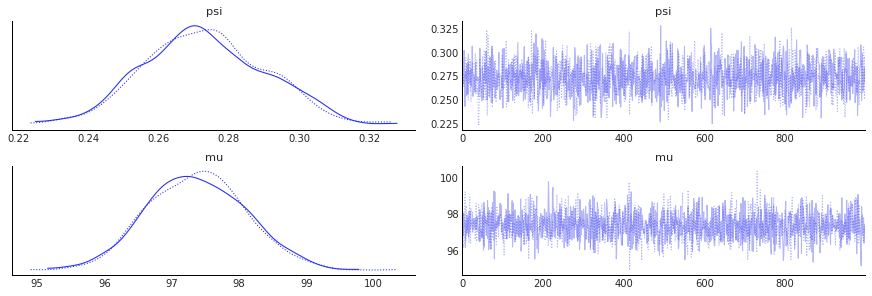

In [520]:
az.plot_trace(trace);

In [521]:
trace.to_netcdf("trace.nc")

## 3. Hierarchical Model (1 parameter)
3. Propose a hierarchical model for the problem. Put hierarchy on only one model parameter (you choose which one, prefer mean)

**hint:**
1. Use non centered parametrization
2. Use pm.Deterministic to track reparametrized parameters
3. 

В этом пункте добавим иерархию на параметр $\mu$, который в целом отвечает за матожидание положительных наблюдений из распределения Zero-Inflated Poisson. Используя нецентрированную параметризацию, обратимся к стандартному нормальному распределению, определим матожидание как Логнормальное распределение (подходит для положительных случайных величин), а стандартное отклонение как Показательное распределение (часто используется для моделирования дисперсий/стандартных отклонений). Обернем это в экспоненту, чтобы гарантированно оказаться в положительной области. Константы для параметров модели определялись таким образом, чтобы prior predictive mean оказалась в разумных пределах относительно наблюдаемых данных.

In [522]:
with pm.Model(coords=dict(store=range(3))) as model1:        
    psi = pm.Beta("psi", 1, 1)
    
#     mu = pm.LogNormal("mu", mu=3, sigma=0.5)
    mu_raw = pm.Normal('mu_raw', mu=0, sigma=1, dims="store")
    mu_mean = pm.LogNormal("mu_mean", mu=1, sigma=0.1)
    mu_var = pm.Exponential("mu_var", lam=100)
    mu_log = mu_raw * mu_var + mu_mean
    mu = pm.Deterministic("mu", at.exp(mu_log), dims="store")
    
    y = pm.ZeroInflatedPoisson("obs", psi, mu[data.store.values], observed=data.obs)

In [594]:
model1

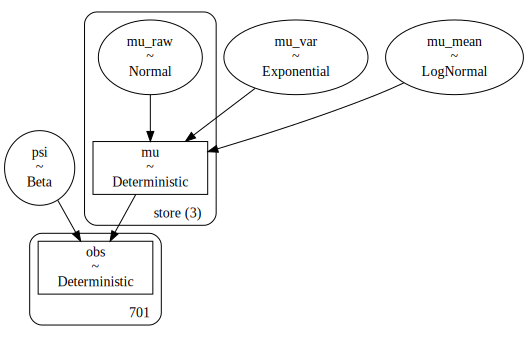

In [628]:
pm.model_to_graphviz(model1)

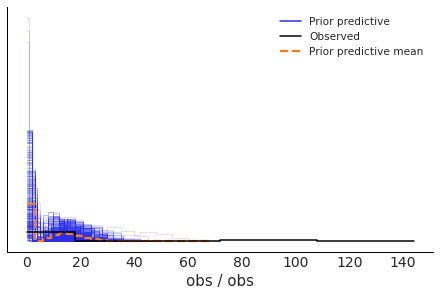

In [523]:
with model1:
    prior1 = pm.sample_prior_predictive()
az.plot_ppc(prior1, group="prior");

In [596]:
with model1:
    trace1 = pm.sample()
    trace1.extend(prior1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [psi, mu_raw, mu_mean, mu_var]
Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 22 seconds.


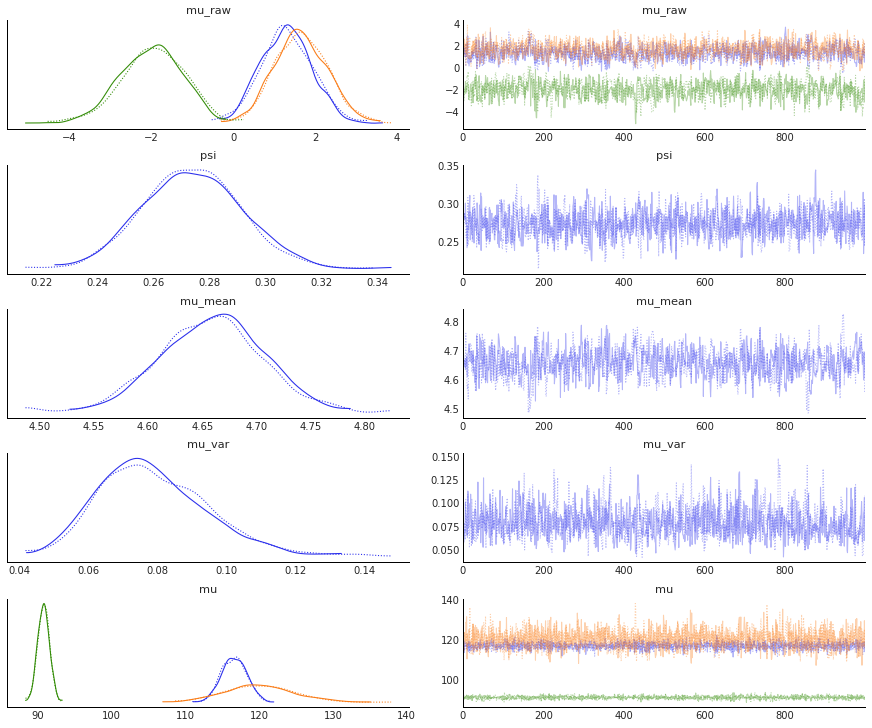

In [597]:
az.plot_trace(trace1);

In [526]:
trace1.to_netcdf("trace1.nc")

## 4. Hierarchical Model (2 parameters)
4. Propose a hierarchical model for the problem. Put hierarchy on 2 model parameters (you choose which additional one, prefer p)

**hint:**

For Hierarchical probs:
1. Dirichlet way
    1. You'll find this useful https://stats.stackexchange.com/a/44725
    2. Gamma or Log Normal is better for Dirichlet btw
    3. Complicated to interpret
2. Or use LogitNormal distribution
    1. simple to interpret
    2. easier to parametrize (same you do normal dist but with a transform)

В этом пункте добавим иерархию на параметр $\psi$, отвечающий за вероятность ненулевого чека по рассматриваемому продукту. Параметры Бета-распределения плохо интерпретируются, поэтому обратимся к Логит-нормальному распределению, которое также предназначено для случайных величин от 0 до 1. Начнем со стандартного нормального распределения, определим для него матожидание как логит-нормальное распределение (чтобы сэмплировать в отрезке от 0 до 1), а стандартное отклонение как показательное распределение (для положительных случайных величин) и обернем все это в сигмоиду, чтобы в итоге оказаться в интервале от 0 до 1. Константы для параметров модели определялись таким образом, чтобы prior predictive mean оказалась в разумных пределах относительно наблюдаемых данных.

In [527]:
with pm.Model(coords=dict(store=range(3))) as model2:
#     psi = pm.Beta("psi", 1, 0.5)
    psi_raw = pm.Normal('psi_raw', mu=0, sigma=1, dims="store")
    psi_mean = pm.LogitNormal("psi_mean", mu=0, sigma=1)
    psi_var = pm.Exponential("psi_var", lam=25)
    psi = pm.Deterministic("psi", at.sigmoid(psi_raw * psi_var + psi_mean), dims="store")
    
#     mu = pm.LogNormal("mu", mu=3, sigma=0.5)
    mu_raw = pm.Normal('mu_raw', mu=0, sigma=1, dims="store")
    mu_mean = pm.LogNormal("mu_mean", mu=1, sigma=0.1)
    mu_var = pm.Exponential("mu_var", lam=25)
    mu = pm.Deterministic("mu", at.exp(mu_raw * mu_var + at.log(mu_mean)), dims="store")
    
    y = pm.ZeroInflatedPoisson("obs", psi[data.store.values], mu[data.store.values], observed=data.obs)

In [610]:
model2

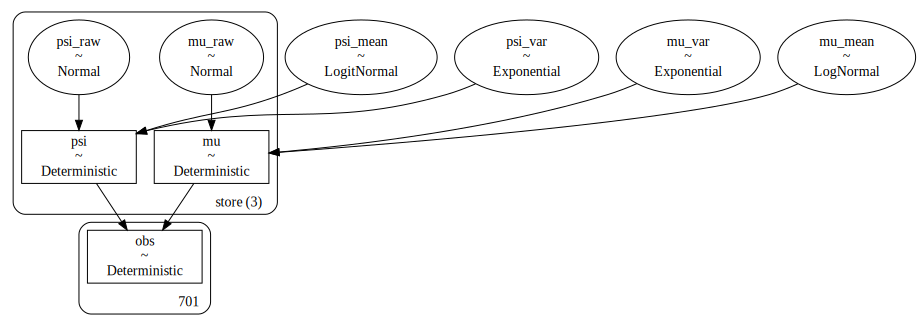

In [629]:
pm.model_to_graphviz(model2)

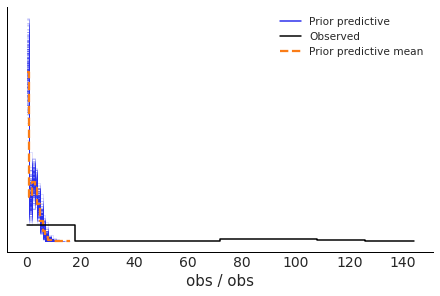

In [528]:
with model2:
    prior2 = pm.sample_prior_predictive()
az.plot_ppc(prior2, group="prior");

In [529]:
with model2:
    trace2 = pm.sample()
    trace2.extend(prior2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [psi_raw, psi_mean, psi_var, mu_raw, mu_mean, mu_var]
Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 142 seconds.


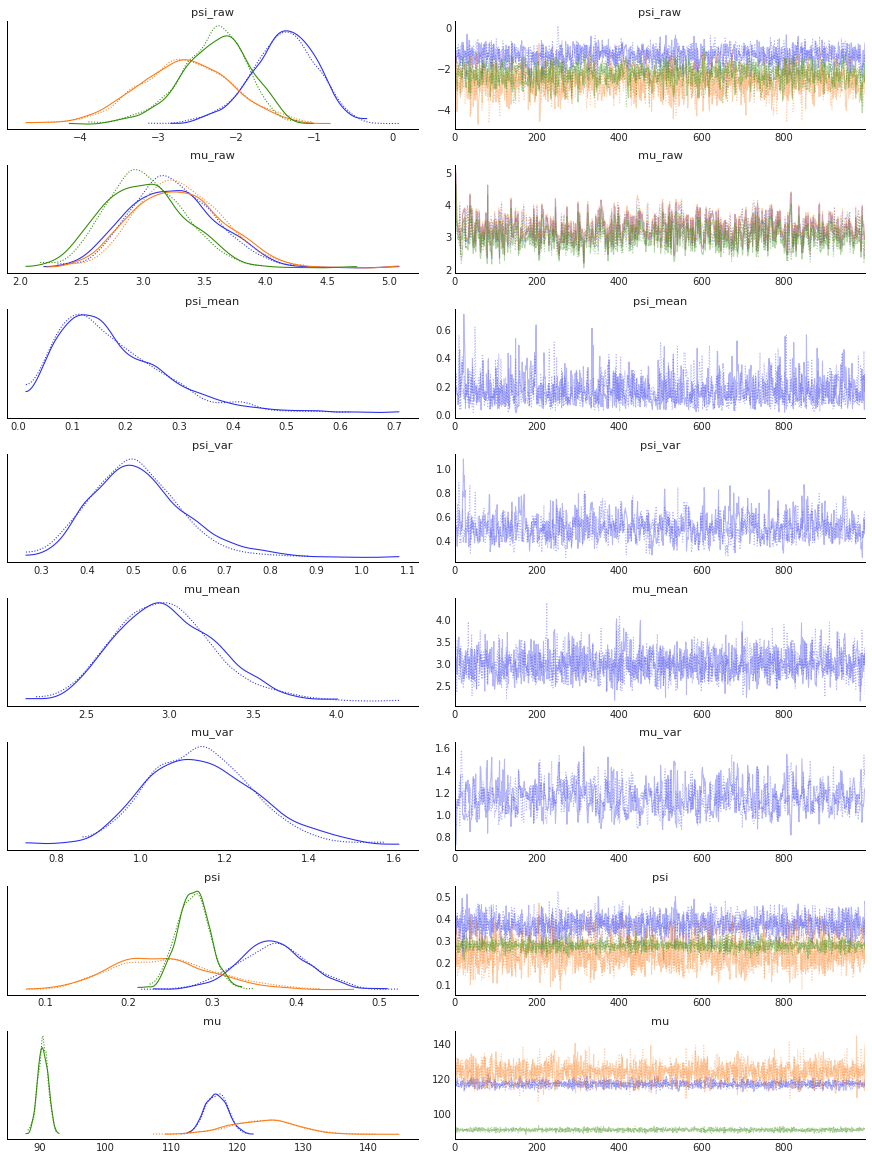

In [530]:
az.plot_trace(trace2);

In [531]:
trace2.to_netcdf("trace2.nc")

## 5. Model Comparison study
5. Perform a model comparison study (look into az.compare)

    1. Interpret the result and choose the best model
    2. Elaborate on Warnings, if there are any

In [532]:
res = az.compare(dict(simple=trace, hierarchy1=trace1, hierarchy2=trace2))

In [533]:
res

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
hierarchy2,0,-1122.338203,5.694997,0.000000,0.689898,55.190851,0.000000,False,log
hierarchy1,1,-1123.660125,4.231255,1.321922,0.310102,56.254230,2.644534,False,log
simple,2,-1253.363376,3.556442,131.025174,0.000000,67.108760,22.011817,False,log


В таблице выше модели отсортированы по метрике качества Leav-One-Out кросс-валидации (loo, на log шкале). В таблице также указаны эффективное количество параметров (p_loo), разность значения метрики между лучшей моделью и данной (d_loo), вероятность, что данная модель окажется истинной (weight), а также стандартные ошибки для loo и d_loo. По всем этим показателям наилучшей моделью считается последняя, с иерархией на оба момента распределения $\mu$ и $\psi$.
Предупреждений модели не выдали.

### Бизнес метрика
Чем больше магазин продает своего товара, тем успешнее можно считать его работу. Одним из вариантов оценки эффективности магазина можно взять среднее число продаж (здесь в натуральном выражении). Если посетитель пришел в магазин и не купил данный товар, это говорит о неэффективности продвижения этого товара, поэтому при расчете средней удалять нули не стоит. Матожидание Zero-inflated Poisson рассчитывается как $\psi\mu$. Сгенерируем наблюдения из апостериорного распределения и сравним среднее значение $\psi\mu$ для каждого магазина.

In [607]:
mu_post = trace2.posterior.stack(sample=('chain', 'draw')).mu.values
psi_post = trace2.posterior.stack(sample=('chain', 'draw')).psi.values

np.multiply(mu_post, psi_post).mean(axis=1)

WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


array([43.50791512, 29.90143978, 25.05885827])

По данной метрике наиболее эффективным магазином является магазин под номером 0, затем идет магазин 1, потом 2.

Еще один способ позволяет сравнить вероятность, что величина чека больше в одном магазине по сравнению с другим. Для этого нужно сгенерировать наблюдения из апостериорного распределения и найти долю элементов одной выборки, которые больше элементов другой выборки.

In [625]:
rng = pm.ZeroInflatedPoisson.dist(psi=psi_post, mu=mu_post)
draws = pm.draw(rng)
s0 = draws[0,:]
s1 = draws[1,:]
s2 = draws[2,:]
s = [s0,s1,s2]
probs = np.zeros((3,3))
for i in range(3):
    for j in range(3):
        probs[i,j] = (s[i]>s[j]).mean()

In [626]:
probs

array([[0.    , 0.2965, 0.3495],
       [0.1995, 0.    , 0.2245],
       [0.1805, 0.2095, 0.    ]])

В этой матрице по строке i стоят вероятности, что средний чек в магазине i больше, чем в другом (сравниваем со всеми). По этой матрице 0-й магазин опять можно считать самым эффективным, затем магазин 1, затем 2.

### Прогноз нового магазина

In [562]:
mu_var_post = trace2.posterior.mu_var.values
mu_mean_post = trace2.posterior.mu_mean.values
mu_raw_new = pm.Normal.dist(mu=0, sigma=1, shape=mu_var_post.shape).eval()

psi_var_post = trace2.posterior.psi_var.values
psi_mean_post = trace2.posterior.psi_mean.values
psi_raw_new = pm.Normal.dist(mu=0, sigma=1, shape=psi_var_post.shape).eval()

In [569]:
mu_new = at.exp(np.multiply(mu_raw_new, mu_var_post) + at.log(mu_mean_post)).eval()
psi_new = at.sigmoid(np.multiply(psi_raw_new, psi_var_post) + psi_mean_post).eval()

rng = pm.ZeroInflatedPoisson.dist(psi=psi_new, mu=mu_new)

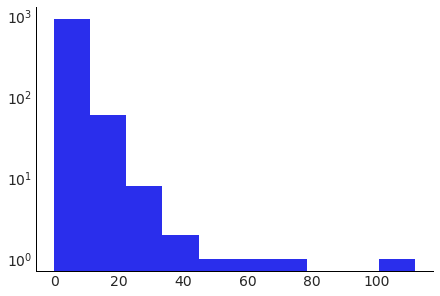

In [581]:
new_store_0, new_store_1 = pm.draw(rng)[0,:], pm.draw(rng)[1,:]
plt.hist(new_store_0, log=True);

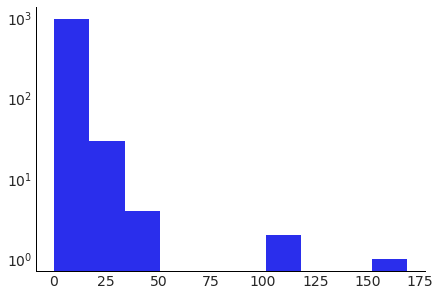

In [582]:
plt.hist(new_store_1, log=True);